In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
code_dir=Path.cwd()
project_dir=code_dir.parent
input_dir=project_dir/"input"
output_dir=project_dir/"output"
tmp_dir=project_dir/"tmp"
cat_dir = project_dir.parent/"cat12"

In [ ]:
statistics_df = pd.read_csv(input_dir/"data_postcovid.csv")

In [57]:
import seaborn as sns
from scipy.stats import ttest_ind
from pingouin import ancova
import matplotlib.pyplot as plt


def box_plot(data,dv,between,covar,xlabel,ylabel, annotation_line_distance_y=0.1,annotation_line_length=0.1,ylim=None,bonferroni_factor=1):

    sns.set(style="darkgrid", rc={'figure.figsize':(3,4)})

    x=data[between]
    y=data[dv]

    plot = sns.boxplot(x=x, y=y, palette="Blues")
    plot.set_ylabel(ylabel)
    plot.set_xlabel(xlabel)
    plt.xticks([0,1],["Controls", "post SARS-CoV-2"])
    ancova_df = ancova(data=data, dv=dv, covar=covar, between=between)
    pval, cohen_f = float(ancova_df[ancova_df["Source"]==between]["p-unc"]), float(ancova_df[ancova_df["Source"]==between]["F"])
    print("before pval",pval)
    pval = pval * bonferroni_factor
    print("after pval", pval)
    if pval > 1: pval = 1
    elif pval < 0.005: pval = "<0.005"
    else: pval = f"{pval:.3f}"
    
    x1,x2 = 0,1
    y,h,col = data[dv].max() + annotation_line_distance_y,annotation_line_length,"k"

    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h+h*0.2, f"$f$ : {cohen_f:.2f}\n$p_{{bonferroni}}$ : {pval}", ha='center', va='bottom', color=col)

    minimum = data[dv].min() -10 
    if minimum < 0: minimum = -5
    maximum = data[dv].max() 
    if maximum > 20 : maximum += 20
    if ylim: 
        minimum = ylim[0]
        maximum = ylim[1]
        plot.set_ylim(minimum, maximum)
    else: plot.set_ylim(minimum , maximum)


    filename="boxplot_" + ylabel.replace(" ","_").lower()

    return plot, ancova_df, filename

# Global imaging stats

before pval 0.2023149774813655
after pval 2.2254647522950206


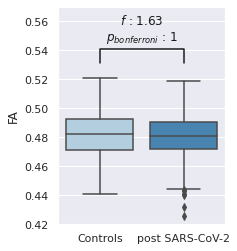

In [22]:
dependent_variable = "tbss_skeleton_mean_FA"
ylabel = dependent_variable.split("_")[-1]
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.01,annotation_line_length=0.01, ylim=(0.42,.570),  bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.05544004603074046
after pval 0.609840506338145


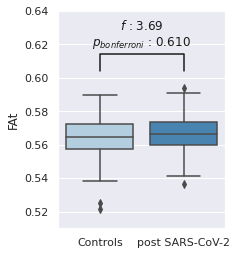

In [23]:
dependent_variable = "tbss_skeleton_mean_FAt"
ylabel = dependent_variable.split("_")[-1]
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.01,annotation_line_length=0.01, ylim=(0.51,.64), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 3.917697141643267e-05
after pval 0.0004309466855807594


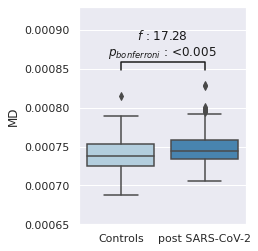

In [24]:
dependent_variable = "tbss_skeleton_mean_MD"
ylabel = dependent_variable.split("_")[-1]
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.00002,annotation_line_length=0.00001, ylim=(0.00065,0.00093), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.5637925157427913
after pval 6.201717673170704


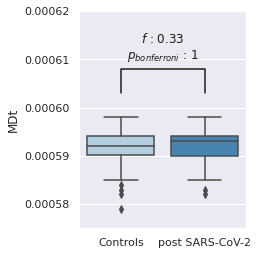

In [25]:
dependent_variable = "tbss_skeleton_mean_MDt"
ylabel = dependent_variable.split("_")[-1]
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.000005,annotation_line_length=0.000005, ylim=(0.000575,0.00062), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 2.1418980370903057e-05
after pval 0.00023560878407993363


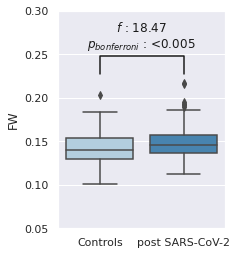

In [26]:
dependent_variable = "tbss_skeleton_mean_FW"
ylabel = dependent_variable.split("_")[-1]
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.01,annotation_line_length=0.02, ylim=(0.05,0.3), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.1759941555187975
after pval 1.9359357107067723


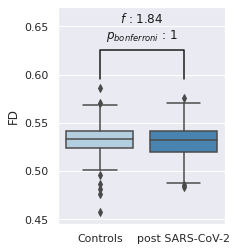

In [27]:
dependent_variable = "tbss_skeleton_mean_fd"
ylabel = "FD"
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.01,annotation_line_length=0.03, ylim=(0.445,0.67), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.8033215663450929
after pval 8.836537229796022


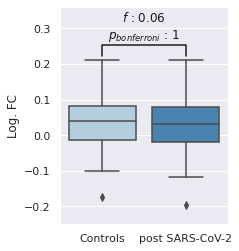

In [28]:
dependent_variable = "tbss_skeleton_mean_logfc"
ylabel = "Log. FC"
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.01,annotation_line_length=0.03, ylim=(-0.25,0.36), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.10605556729149718
after pval 1.166611240206469


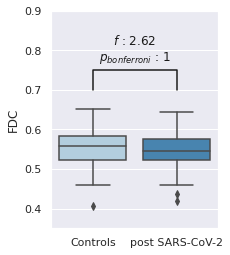

In [29]:
dependent_variable = "tbss_skeleton_mean_fdc"
ylabel = "FDC"
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.05,annotation_line_length=0.05, ylim=(0.35,0.9), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.633559023694145
after pval 6.969149260635595


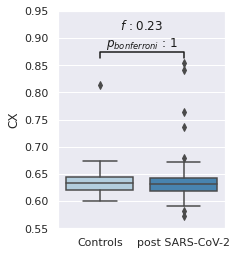

In [30]:
dependent_variable = "tbss_skeleton_mean_complexity"
ylabel = "CX"
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.01,annotation_line_length=0.01, ylim=(0.55,0.95), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.01100054262954363
after pval 0.12100596892497992


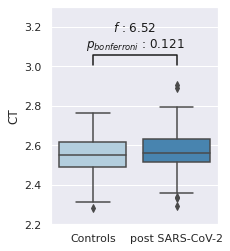

In [95]:
dependent_variable = "thickness_mean"
ylabel = "CT"
box_plot(data=statistics_df.drop(to_exclude_t1, axis=0, errors="ignore"),dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.1,annotation_line_length=0.05, ylim=(2.2,3.3), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.0048187381772576985
after pval 0.05300611994983468


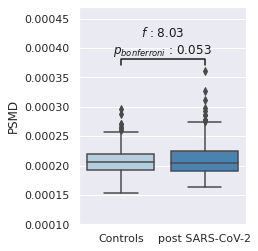

In [32]:
dependent_variable = "psmd_global"
ylabel = "PSMD"
box_plot(data=statistics_df,dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.00001,annotation_line_length=0.00001, ylim=(0.0001,0.00047), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')

before pval 0.39387607484442244
after pval 4.332636823288647


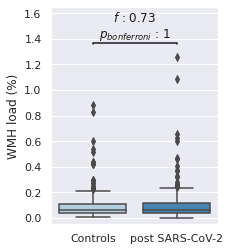

In [33]:
dependent_variable = "wmh_load_perc"
ylabel = "WMH load (%)"
box_plot(data=statistics_df.drop(to_exclude_wmh, axis=0, errors="ignore"),dv=dependent_variable,between="cohort",covar=["age", "sex", "years_of_education"],
xlabel="",ylabel=ylabel,
annotation_line_distance_y=0.1,annotation_line_length=0.01, ylim=(-0.05,1.65), bonferroni_factor=11)
plt.savefig(output_dir/f"descriptive_stats/group_comparison_{ylabel}.png", dpi=300, bbox_inches='tight')